## About

This plot is a [Choropleth map](https://python-graph-gallery.com/choropleth-map/). It shows the cancer rate per country is various European countries using the SHARE Survey data.

The chart was made by [Joseph B.](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![choropleth map with color gradient](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-map-europe-with-color-by-country-highres.png?raw=true)


## Libraries

First, you need to install the following librairies:

- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- [pandas](https://python-graph-gallery.com/pandas/) and `geopandas` are used to put the data into a dataframe and manipulate geographical data

And that's it!


In [1]:
# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from highlight_text import fig_text

# data
import pandas as pd
import geopandas as gpd

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://github.com/holtzy/The-Python-Graph-Gallery). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

The dataset contains one row per country and the associated cancer rate.


In [2]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/cancer_rate.csv"
cancer_rates = pd.read_csv(url)

## Get map positions

Since our dataset contains only the country name and the cancer rate, we need to find a way to get actual country shape to put in our plot. For this we need to load a mapping dataset that you can get at [Natural Earth Data](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) (`Download countries` button). Then unzip it and get the `.shp` file and load it.


In [3]:
# world map (Replace with your path)
world = gpd.read_file(
    "../../static/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[world['CONTINENT'] == 'Europe']

Once we get that file, we need to merge it with our actual dataset:


In [4]:
data = europe.merge(cancer_rates, how='left',
                    left_on='NAME', right_on='Country')
data.dropna(subset=['Cancer'], inplace=True)
data['Cancer'] = round(data['Cancer']*100, 1)

## Background map

Thanks to the `geopandas` library, we can easily add a **background map** to our plot. We just need to call the `plot()` function on our `geo dataframe`.

With just a few lines of code, we can create a **syntetic map** that shows a European map.


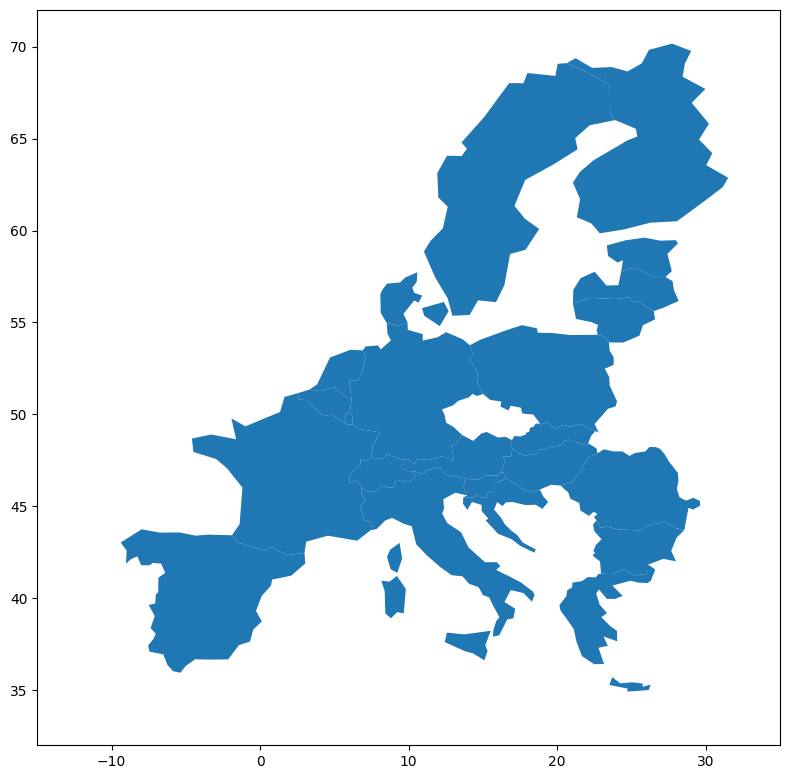

In [5]:
# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# create the plot
data.plot(ax=ax)

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)

# display the plot
plt.tight_layout()
plt.show()

## Custom the axis

When we create map, we are generally **not interested in the axis** because the map itself contains all the information. For this, we use the `axis('off')` function to remove the axis.


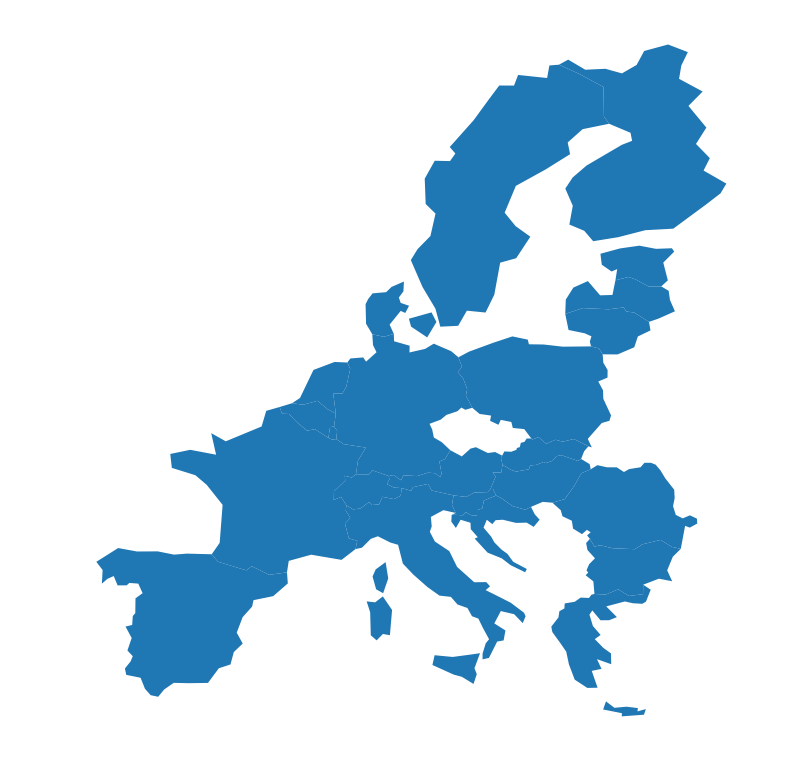

In [6]:
# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# create the plot
data.plot(ax=ax)

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# display the plot
plt.tight_layout()
plt.show()

## Color the map

In this chart, the color of the country will be used to display the value of the rate. For that we need to use a colormap. In our case, we will also **normalize** it, meaning that we will use a **color gradient** that goes (more or less) from the minimum to the maximum value of our dataset. This ensures that the **color is representative** of the data.

For this, we use the:

- add a `column` argument to specify the column to use for the color
- `cmap` argument (we will use a white to red gradient)
- `vmin` and `vmax` arguments to set the **color scale** limits


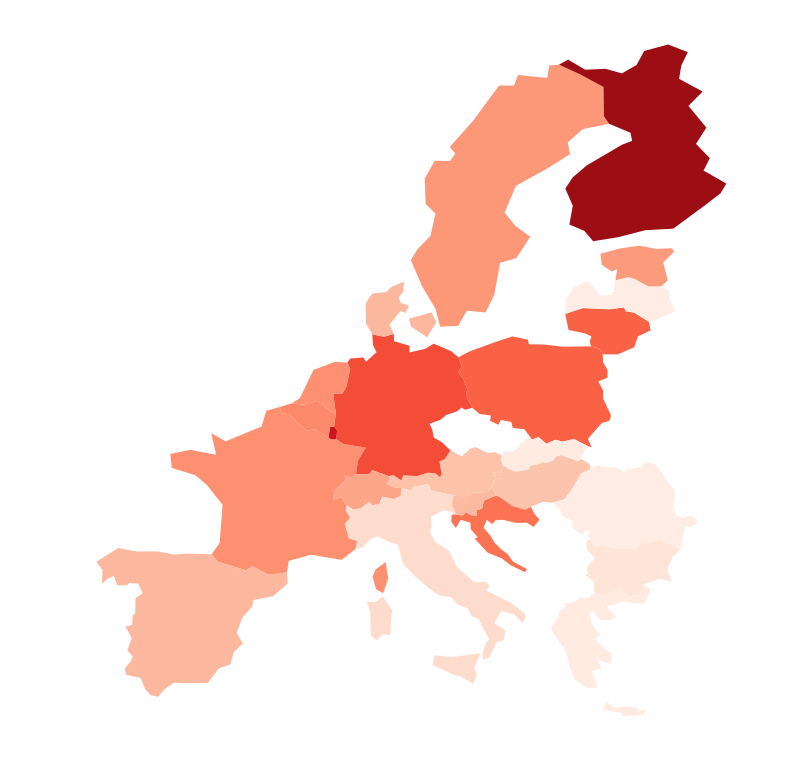

In [7]:
# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.Reds
min_rate, max_rate = 2, 12
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column='Cancer', cmap=cmap, norm=norm, ax=ax)

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# display the plot
plt.tight_layout()
plt.show()

It's already looking better!


## Custom other colors

What makes a map look good is not the only the color of the countries, but also adding a thin **border** to each country. This is also a way of illustrating the **lack of data** for some countries.

This is done with:

- the `edgecolor` argument for the **color**
- the `linewidth` argument for the **width**


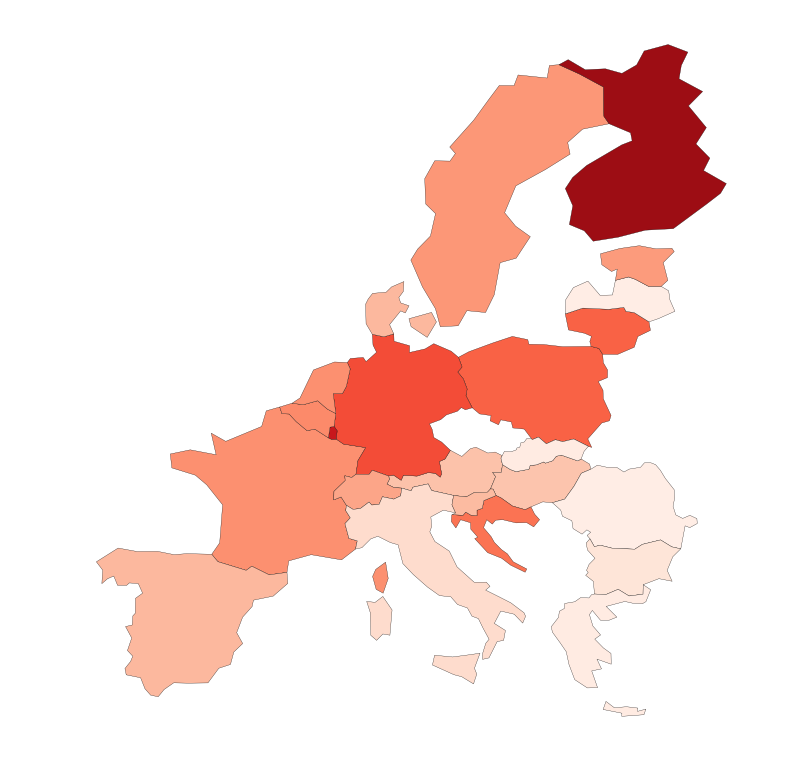

In [8]:
# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.Reds
min_rate, max_rate = 2, 12
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column='Cancer', cmap=cmap, norm=norm,
          edgecolor='black', linewidth=0.2, ax=ax)

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# display the plot
plt.tight_layout()
plt.show()

## Annotations

Annotations is probably the **most important part** of nice visualizations! Unfortunately, it's also a part that takes a lot of time and code 😅.

### Add country names

In this code, we'll automate adding the country name to the map. This is done with a `for` loop that goes through each country and adds the name to the map. However, adding all countries is not relevant, so we'll select a few countries to add to the map.

In order to define where to put the name, we use the `centroid` attribute of the `geometry` column of the `geo` dataframe. This gives us the **center of the country**. This is a good proxy for the country's position, but we'll also **manually add a correction** to the position to make it look better.

### Add a title

The title is added with the `text()` function and not the `title()` function because it gives us **more customization options**.

### Add a credit

For the credit, we need the [highlight_text](https://github.com/znstrider/highlight_text) package that makes way easier customizing annotations! We use the `fig_text()` function, which is similar to `fig.text()` but with **more customization options**.

### Add arrows

We will create a custom arrow in Matplotlib by defining its style, size, and color, and then positions it on the figure using specified **tail and head coordinates**. It uses a `FancyArrowPatch` for flexible styling, including an **arc connection style**, and adds this arrow to the current plot's axes. This approach allows for detailed customization and highlighting within visual presentations, making it ideal for annotating or **drawing attention** to specific areas of a plot.


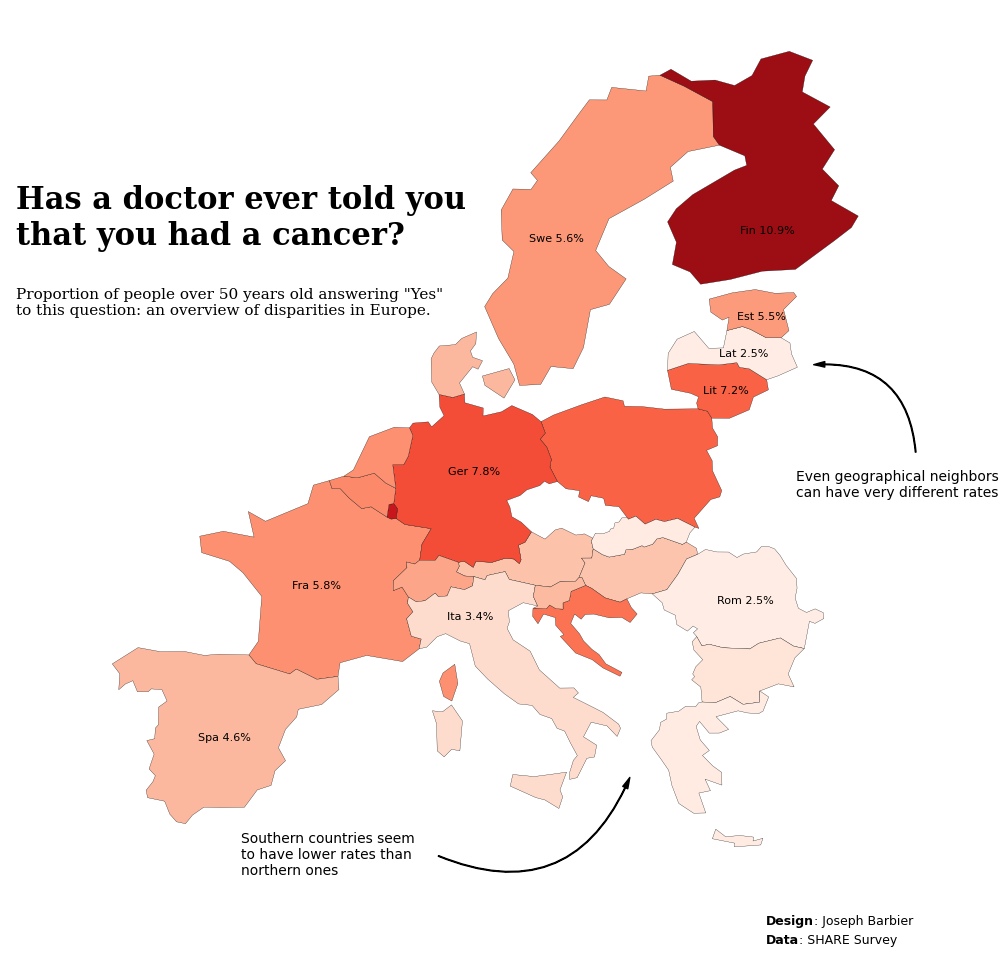

In [9]:
# initialize the figure
fig, ax = plt.subplots(figsize=(15, 10))

# define colors
cmap = cm.Reds
min_rate, max_rate = 2, 12
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column='Cancer', cmap=cmap, norm=norm,
          edgecolor='black', linewidth=0.2, ax=ax)

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
year = 2019
wave = 8
fig.text(0.2, 0.75, 'Has a doctor ever told you\nthat you had a cancer?',
         fontsize=22, fontweight='bold', fontfamily='serif')
fig.text(0.2, 0.68, f'Proportion of people over 50 years old answering "Yes"\nto this question: an overview of disparities in Europe.',
         fontsize=11, fontweight='ultralight', fontfamily='serif')

# add credit source at the bottom
text = "<Design>: Joseph Barbier\n<Data>: SHARE Survey"
fig_text(0.7, 0.08,
         s=text,
         color='black',
         fontsize=9,
         highlight_textprops=[{"fontweight": 'bold'},
                              {"fontweight": 'bold'}],
         ax=ax)

# bloc of text on the right
fig.text(0.72, 0.51, 'Even geographical neighbors\ncan have very different rates',
         fontsize=10,
         fontweight='ultralight',
         verticalalignment='center',
         fontfamily='DejaVu Sans')
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
tail_position = (0.8, 0.54)
head_position = (0.73, 0.63)
a = patches.FancyArrowPatch(tail_position, head_position,
                            connectionstyle="arc3,rad=.5",
                            transform=fig.transFigure,
                            **kw)
plt.gca().add_patch(a)

# bloc of text on the bottom
fig.text(0.35, 0.14, 'Southern countries seem\nto have lower rates than\nnorthern ones',
         fontsize=10,
         fontweight='ultralight',
         verticalalignment='center',
         fontfamily='DejaVu Sans')
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
tail_position = (0.48, 0.14)
head_position = (0.61, 0.22)
a = patches.FancyArrowPatch(tail_position, head_position,
                            connectionstyle="arc3,rad=.5",
                            transform=fig.transFigure,
                            **kw)
plt.gca().add_patch(a)

# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
countries_to_annotate = ['France', 'Italy', 'Romania',
                         'Lithuania', 'Finland', 'Estonia',
                         'Latvia', 'Spain', 'Germany',
                         'Sweden']
adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -1),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 'Cancer'].values[0]
    ax.annotate(f'{country[:3]} {rate}%', (x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

## Going further

This article explains how to reproduce a [choropleth map](https://python-graph-gallery.com/choropleth-map/) with annotations, colormap and nice features.

For more examples of **advanced customization** in map, check out [choropleth map of America](https://python-graph-gallery.com/choropleth-map-geopandas-python/). Also, you might be interested in [creating interactive map](https://python-graph-gallery.com/292-choropleth-map-with-folium/) with Folium.
